In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-21 09:47:19.367618: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 09:47:19.404891: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 09:47:19.946643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_rosa_art', 'Cam_barba_ruca_art','Cam_santana_art']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_rosa_art']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_rosa_art']+df_Camaroes.loc[i, 'Cam_barba_ruca_art']+df_Camaroes.loc[i,'Cam_santana_art']
  
dados = dados[['Ano','Cam_rosa_art','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_rosa_art'] = dados.loc[i,'Cam_rosa_art'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_rosa_art'].values
dados.head()

/tmp/ipykernel_107854/1768512690.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_rosa_art']+df_Camaroes.loc[i, 'Cam_barba_ruca_art']+df_Camaroes.loc[i,'Cam_santana_art']


,Ano,Cam_rosa_art,Soma,Prop_Cam_rosa_art
0,1989,471.0,4865.0,0.096814
1,1996,71.5,222.0,0.322072
2,1997,235.0,703.5,0.334044
3,1998,65.0,331.0,0.196375
4,1999,76.0,368.5,0.206242


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/pesos prop art 1989-2022/.weights.h5', overwrite=True)

Epoch 1/500


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9968
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9490
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9105
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8728
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8334
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7907
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7462
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7039
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6671
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6388
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6201
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6090
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6040
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6033
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6023
Epoch 16/500
1/1 ━━━━━━━━━━━━━━━━

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/pesos prop art 1989-2022/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.10772687]
 [0.13346061]
 [0.16243929]
 [0.19241974]
 [0.2226706 ]
 [0.2543726 ]
 [0.28607485]
 [0.31067854]
 [0.28817564]
 [0.26338053]
 [0.23946118]
 [0.26416075]
 [0.28851658]
 [0.27995646]
 [0.2846763 ]
 [0.28915238]
 [0.2842793 ]
 [0.2582059 ]
 [0.19323234]
 [0.30321983]
 [0.9858743 ]
 [1.        ]
 [0.9880608 ]
 [0.9009625 ]
 [0.8243811 ]
 [0.79994434]
 [0.90295595]
 [0.16306041]
 [0.24357517]
 [0.30377007]
 [0.6153875 ]
 [0.90522516]
 [0.97185665]
 [1.        ]]


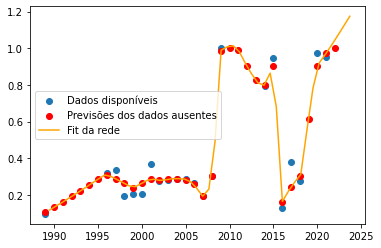

In [6]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

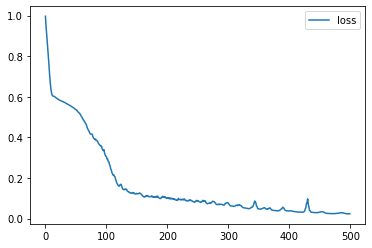

In [7]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [8]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para Camarao_art(sem sete barbas e branco)
df_prev_Camarao_art = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/Cam_art_sem_sb_br.xlsx')

for i in range(len(df_prev_Camarao_art['Ano'])):
       df.loc[i,'Camarao_art'] = df_prev_Camarao_art.loc[i,'Camarao_art']


df_preenchido = df[['Ano','Cam_rosa_art']].replace(np.nan,0)
for i in range(len(prev_continua)):
      df_preenchido.loc[i,'Cam_rosa_art']=df_preenchido.loc[i,'Cam_rosa_art']+df.loc[i,'Camarao_art']*prev_continua[i]
      df_preenchido.loc[i,'Valor acrescido']=df.loc[i,'Camarao_art']*prev_continua[i]
      

with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/Previsão Camarao_rosa_art_1989-2022.xlsx')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     Ano  Cam_rosa_art  Valor acrescido
0   1950      0.000000         0.000000
1   1951      0.000000         0.000000
2   1952      0.000000         0.000000
3   1953      0.000000         0.000000
4   1954      0.000000         0.000000
5   1955      0.000000         0.000000
6   1956      0.000000         0.000000
7   1957      0.000000         0.000000
8   1958      0.000000         0.000000
9   1959      0.000000         0.000000
10  1960      0.000000         0.000000
11  1961      0.000000         0.000000
12  1962      0.000000         0.000000
13  1963      0.000000         0.000000
14  1964      0.000000         0.000000
15  1965      0.000000         0.000000
16  1966      0.000000         0.000000
17  1967      0.000000         0.000000
18  1968      0.000000         0.000000
19  1969      0.000000         0.000000
20  1970      0.000000         0.000000
21  1971      0.000000         0.000000
22  1972      0.000000         0.000000
23

In [9]:
#Planilha com Camarao_art decrescido do que ja foi usado de 1989 ate 2022
Cam_art_sem_sb_br_ro_89_22 = df[['Ano','Camarao_art']].replace(np.nan,0)
for i in range(len(prev_continua)):
    Cam_art_sem_sb_br_ro_89_22.loc[i,'Camarao_art']-=Cam_art_sem_sb_br_ro_89_22.loc[i,'Camarao_art']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
  print(Cam_art_sem_sb_br_ro_89_22)

Cam_art_sem_sb_br_ro_89_22.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/Cam_art_sem_sb_br_ro_89-22.xlsx')

     Ano  Camarao_art
0   1950     0.000000
1   1951     0.000000
2   1952     0.000000
3   1953     0.000000
4   1954     0.000000
5   1955     0.000000
6   1956     0.000000
7   1957     0.000000
8   1958     0.000000
9   1959     0.000000
10  1960     0.000000
11  1961     0.000000
12  1962     0.000000
13  1963     0.000000
14  1964     0.000000
15  1965     0.000000
16  1966     0.000000
17  1967     0.000000
18  1968     0.000000
19  1969     0.000000
20  1970     0.000000
21  1971     0.000000
22  1972     0.000000
23  1973     0.000000
24  1974     0.000000
25  1975    37.307281
26  1976    47.091553
27  1977   213.001068
28  1978  1363.966797
29  1979   233.088104
30  1980   141.734192
31  1981   114.285919
32  1982   173.308472
33  1983   258.191193
34  1984   235.408310
35  1985   489.113953
36  1986   567.040588
37  1987   723.530029
38  1988   587.382629
39  1989   673.567932
40  1990     0.000000
41  1991     0.000000
42  1992     0.000000
43  1993     0.000000
44  1994  

In [10]:
#Fazendo uma planilha com Camarao_art decrescido do que ja foi retirado em todos os anos   (sete barbas,branco,rosa)
Cam_art_sem_sb_br_ro_50_88=pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/Cam_art_sem_sb_br_ro_50-88.xlsx')

Cam_art_sem_sb_br_ro = df[['Ano','Camarao_art']].replace(np.nan,0)
for i in range(len(Cam_art_sem_sb_br_ro['Ano'])):
    if i+1950 in Cam_art_sem_sb_br_ro_50_88['Ano'].values:
        Cam_art_sem_sb_br_ro.loc[i,'Camarao_art'] = Cam_art_sem_sb_br_ro_50_88.loc[i,'Camarao_art'] 
    else:
        Cam_art_sem_sb_br_ro.loc[i,'Camarao_art'] = Cam_art_sem_sb_br_ro_89_22.loc[i,'Camarao_art'] 

with pd.option_context('display.max_rows', None,):
  print(Cam_art_sem_sb_br_ro)

Cam_art_sem_sb_br_ro.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/Cam_art_sem_sb_br_ro.xlsx')


     Ano  Camarao_art
0   1950     0.000000
1   1951     0.000000
2   1952     0.000000
3   1953     0.000000
4   1954     0.000000
5   1955     0.000000
6   1956     0.000000
7   1957     0.000000
8   1958     0.000000
9   1959     0.000000
10  1960     0.000000
11  1961     0.000000
12  1962     0.000000
13  1963     0.000000
14  1964     0.000000
15  1965     0.000000
16  1966     0.000000
17  1967     0.000000
18  1968     0.000000
19  1969     0.000000
20  1970     0.000000
21  1971     0.000000
22  1972     0.000000
23  1973     0.000000
24  1974     0.000000
25  1975    28.932766
26  1976    36.312584
27  1977   163.314636
28  1978  1039.828491
29  1979   176.677811
30  1980   106.815399
31  1981    85.631287
32  1982   129.097870
33  1983   192.492584
34  1984   177.173462
35  1985   371.693787
36  1986   435.165100
37  1987   561.944336
38  1988   462.768799
39  1989   673.567932
40  1990     0.000000
41  1991     0.000000
42  1992     0.000000
43  1993     0.000000
44  1994  